In [2]:
from Modulation import get_modulated_rates
import numericalunits as nu

<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:39: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Ansh\AppData\Local\Temp\ipykernel_29380\698172201.py:25: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("$\eta$ [s / km]")
C:\Users\Ansh\AppData\Local\Temp\ipykernel_29380\698172201.py:39: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'Verne mX = {test_mX}, $\sigma_e =$ {test_cs}')


CUDA GPU found, performing calculations on GPU
Using form factor calculated from file: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../QCDark/results/Si_final.hdf5


C:\Users\Ansh\AppData\Local\Temp\ipykernel_29380\698172201.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


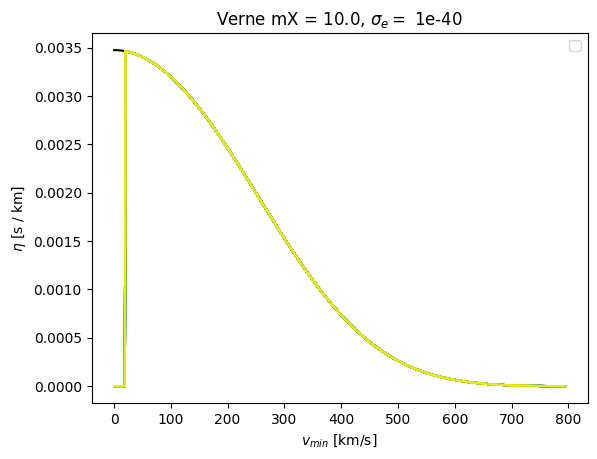

In [18]:
import sys
sys.path.append('..')
import numpy as np
import torch
import DMeRates
import DMeRates.DMeRate as DMeRate
import matplotlib.pyplot as plt
import matplotlib

cmap = plt.get_cmap('viridis')
norm = plt.Normalize(0,36)


dmrates = DMeRate.DMeRate('Si',QEDark=False)
test_cs = 1e-40
dmrates.update_crosssection(test_cs)
test_mX= 10.
FDMn = 2
isoangles = np.arange(36)

vmax = dmrates.vEarth + dmrates.vEscape
vMins = torch.linspace(0,vmax,1000)
vMins_plot = np.linspace(0,vmax,1000) / (nu.km / nu.s)
plt.figure()
plt.ylabel("$\eta$ [s / km]")
plt.xlabel('$v_{min}$ [km/s]')
dmrates.setup_halo_data(test_mX,FDMn,'shm')

eta_shm = dmrates.get_halo_data(vMins,'shm',halo_id_params=None).flatten()  / (nu.s / nu.km)
eta_shm = eta_shm.cpu()
plt.plot(vMins_plot,eta_shm,color='black')
for iso in isoangles:
    dmrates.setup_halo_data(test_mX,FDMn,'modulated',isoangle=iso,useVerne=True)
    eta = dmrates.get_halo_data(vMins,'modulated',halo_id_params=None).flatten()  / (nu.s / nu.km)
    eta = eta.cpu()
    line_color = cmap(norm(iso))
    plt.plot(vMins_plot,eta,color=line_color)
plt.legend()
plt.title(f'Verne mX = {test_mX}, $\sigma_e =$ {test_cs}')
plt.show()
plt.close()


CUDA GPU found, performing calculations on GPU
Using form factor calculated from file: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../QCDark/results/Si_final.hdf5
CUDA GPU found, performing calculations on GPU
Using form factor calculated from file: c:\Users\Ansh\Projects\DarkMatterRates\modulation_study\..\DMeRates\../QCDark/results/Si_final.hdf5


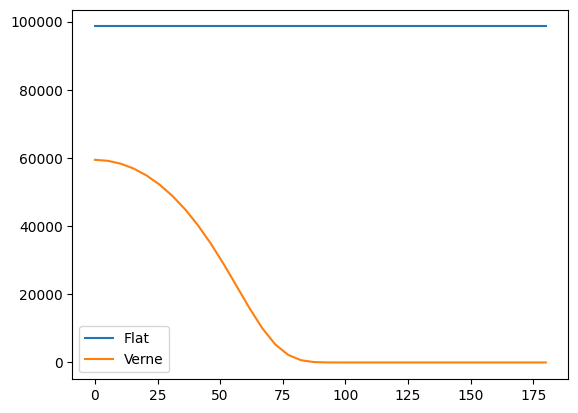

In [7]:
test_mX = .6 #MeV
test_cs = 1e-29
FDMn = 2
ne = 1
useQCDark = True
i_v,r_v = get_modulated_rates('Si',test_mX,test_cs,FDMn,ne,useVerne=True,useQCDark=useQCDark)
i_f,r_f = get_modulated_rates('Si',test_mX,test_cs,FDMn,ne,useVerne=True,useQCDark=useQCDark,flat=True)

# i_d,r_d = get_modulated_rates('Si',test_mX,test_cs,FDMn,ne,useVerne=False,useQCDark=useQCDark)
r_v = r_v*nu.kg * nu.day
r_f = r_f *nu.kg * nu.day

import matplotlib.pyplot as plt
plt.plot(i_f,r_f,label='Flat')

plt.plot(i_v,r_v,label='Verne')
# plt.plot(i_d,r_d,label='DaMaSCUS')
plt.legend()
plt.show()
plt.close()


In [ ]:
test_mX = 30.89 #MeV
test_cs = 1e-39
FDMn = 0
ne = 2
useQCDark = True
i_v,r_v = get_modulated_rates('Ar',test_mX,test_cs,FDMn,ne,useVerne=True,useQCDark=useQCDark)

# i_d,r_d = get_modulated_rates('Xe',test_mX,test_cs,FDMn,ne,useVerne=False,useQCDark=useQCDark)

import sys
sys.path.append('../wimprates_mod/')


import matplotlib.pyplot as plt

plt.plot(i_v,r_v,label='Verne')
# plt.plot(i_d,r_d,label='DaMaSCUS')

plt.legend()
plt.show()
plt.close()
import numpy as np
print((np.max(r_v) - np.min(r_v) )/ 2)


In [ ]:
from Modulation import get_amplitude
get_amplitude(test_mX,test_cs,0,'Ar',0,180,ne,fractional=False,useVerne=True,fromFile= False)

In [ ]:
test_mX = 10. #MeV
test_cs = 1e-34
FDMn = 0
ne = 1
useQCDark = True
i_v,r_v = get_modulated_rates('Ar',test_mX,test_cs,FDMn,ne,useVerne=True,useQCDark=useQCDark)

i_d,r_d = get_modulated_rates('Ar',test_mX,test_cs,FDMn,ne,useVerne=False,useQCDark=useQCDark)

import matplotlib.pyplot as plt

plt.plot(i_v,r_v,label='Verne')
plt.plot(i_d,r_d,label='DaMaSCUS')
plt.legend()
plt.show()
plt.close()


In [1]:
from Modulation import generate_damascus_rates_with_error


In [2]:
ne = 1
overwrite = False
for FDMn in [0,2]:
    for material in ['Si']:
        generate_damascus_rates_with_error(ne,material,FDMn,useQCDark = True,DoScreen=True,overwrite=False,verbose=False,save=True)


/Users/ansh/Local/SENSEI/DarkMatterRates/modulation_study/Modulation.py:177: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


CUDA/MPS GPU not found, performing calculations on cpu (if you are doing this on apple silicon you can change your device to mps if you'd like)
Using form factor calculated from file: /Users/ansh/Local/SENSEI/DarkMatterRates/modulation_study/../DMeRates/../QCDark/results/Si_final.hdf5


  0%|          | 0/760 [00:00<?, ?it/s]

/Users/ansh/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/__init__.py:1236: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:436.)
  _C._set_default_tensor_type(t)
/Users/ansh/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torchquad/integration/simpson.py:76: UserWarning: N per dimension cannot be even due to necessary subdivisions. N per dim will now be changed to the next lower integer, i.e. 1250 -> 1249.
  warnings.warn(
/Users/ansh/.pyenv/versions/3.12.2/lib/python3.12/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, *

CUDA/MPS GPU not found, performing calculations on cpu (if you are doing this on apple silicon you can change your device to mps if you'd like)
Using form factor calculated from file: /Users/ansh/Local/SENSEI/DarkMatterRates/modulation_study/../DMeRates/../QCDark/results/Si_final.hdf5


  0%|          | 0/602 [00:00<?, ?it/s]

In [ ]:
from Modulation import generate_modulated_rates
overwrite = False
first = True
for doScreen in [True,False]:
    for useVerne in [True]:
        for useQCDark in [False,True]:
            for FDMn in [0,2]:
                for material in ['Si','Xe','Ar']:
                    if doScreen == False and useQCDark == True:
                        continue
                    generate_modulated_rates(material,FDMn,useQCDark=useQCDark,useVerne=useVerne,doScreen=doScreen,overwrite=overwrite)


In [ ]:
from Modulation import get_modulated_rates,fitted_rates
import matplotlib.pyplot as plt
import numpy as np
mX = 0.6
sigmaE = 1e-30
FDMn = 2
i,r = get_modulated_rates(mX,sigmaE,FDMn,useVerne=False,calcError=None,ne=1,useQCDark=True)
i,rhigh = get_modulated_rates(mX,sigmaE,FDMn,useVerne=False,calcError='High',ne=1,useQCDark=True)
iv,rv = get_modulated_rates(mX,sigmaE,FDMn,useVerne=True,calcError=None,ne=1,useQCDark=True)

anglegrid,fit_vector,paramters,errors = fitted_rates(i,r,rates_err=rhigh-r,linear=False)
fit = fit_vector[0]
fit_upper = fit_vector[1]
fit_lower = fit_vector[2]


filedataqcark  = np.loadtxt(f'damascus_modulated_rates_screened_qcdark/mX_{str(mX).replace('.','_')}_MeV_sigmaE_{sigmaE}_FDM{FDMn}.csv',delimiter=',')
ifile = filedataqcark[:,0]
rfile_ne1 = filedataqcark[:,1]
plt.errorbar(i,r,yerr = rhigh-r,ls="None")
plt.plot(i,r,label='DaMaSCUS',ls='--')
plt.scatter(i,rfile_ne1,label='DaMaSCUS file',alpha= 0.5)

plt.plot(anglegrid,fit,color='red',label="Fit")
# plt.fill_between(anglegrid,fit_lower,fit_upper,color='red',label="Fit Uncertainty",alpha=0.3)



plt.plot(iv,rv,label='Verne')
plt.xlabel('Isoangle')
plt.ylabel("Rate [events/g/day]")
fdm_dict = { 0: '$F_{\mathrm{DM}} = 1$', 2: "$F_{\mathrm{DM}} \propto$ $1/q^2$"}
plt.title(f'$m_\chi$ = {mX}, $\overline\sigma_e$ = {sigmaE}, {fdm_dict[FDMn]}')
plt.legend()
plt.show()
plt.close()

In [ ]:
import os
from tqdm.autonotebook import tqdm
import re
FDMn = 2
useQCDark = True
useVerne = False

calc_method_dict = {True: "verne", False: "damascus"}   

qedict = {True: "_qcdark",False: "_qedark"}
fromFile = True
ne = 1
isoindex = 3
isoangles = np.linspace(0,180,36)



qestr = qedict[useQCDark]
halo_type = calc_method_dict[useVerne]
halo_dir = f'./{halo_type}_modulated_rates_screened{qestr}/'
file_list = os.listdir(halo_dir)
masses = []
crossections = []
rates =[]
rates_verne = []
test_mX = 1.0
print('test mass', test_mX)
print('test FDMN',FDMn)
for f in tqdm(range(len(file_list))):
    file = file_list[f]
    if 'mX' not in file:
        continue
    mass_str = re.findall('mX_.+MeV',file)[0][3:-4]
    mX = float(mass_str.replace('_','.'))
    if mX != test_mX:
        continue

    sigmaE = re.findall('sigmaE_.+_FD',file)[0][7:-3]

    sigmaE = float(sigmaE)
    Fdm= int(re.findall('FDM.+.csv',file)[0][3:-4])
    if Fdm != FDMn:
        continue
    
    # if fromFile:
    #     mass_str = str(mX).replace('.','_')
    #     file = f'./{halo_type}_modulated_rates_screened{qestr}/mX_{mass_str}_MeV_sigmaE_{sigmaE}_FDM{FDMn}.csv'
    #     fdata = np.loadtxt(file,delimiter=',')
    #     soangles = fdata[:,0]
    #     rate = fdata[:,ne]



    # else:   
    try:
        iv,rv = get_modulated_rates(mX,sigmaE,FDMn,useVerne=True,calcError=None,ne=1,useQCDark=True)
    except TypeError:
        from Modulation import find_exp
        print(sigmaE)
        sigmaEexp = find_exp(sigmaE)
        print(sigmaEexp)
        sigmaEv = 3.16*(10**sigmaEexp)
        try:
            iv,rv = get_modulated_rates(mX,sigmaE,FDMn,useVerne=True,calcError=None,ne=1,useQCDark=True)
        except:
            print(sigmaE,'failed')
            continue
    rate_v = rv[isoindex]
    try:
        i,r = get_modulated_rates(mX,sigmaE,FDMn,useVerne=False,calcError=None,ne=1,useQCDark=True)
    except TypeError:
        print(mX,sigmaE)
        raise TypeError
        
    i,rhigh = get_modulated_rates(mX,sigmaE,FDMn,useVerne=False,calcError='High',ne=1,useQCDark=True)
    try:
        anglegrid,fit_vector,paramters,errors = fitted_rates(i,r,rates_err=rhigh-r,linear=False)
    except:
        try:
            anglegrid,fit_vector,paramters,errors = fitted_rates(i,r,linear=False)
        except:
            continue

    fit = fit_vector[0]
    rate = fit[isoindex]

    masses.append(mX)
    crossections.append(sigmaE)
    rates.append(rate)
    rates_verne.append(rate_v)
    





In [ ]:
rates =  np.array(rates)
rates_verne = np.array(rates_verne)
masses = np.array(masses)
crossections = np.array(crossections)

In [ ]:
plt.scatter(crossections,rates,label='DaMaSCUS')
plt.scatter(crossections,rates_verne,label='Verne')
plt.legend()
plt.ylabel('Rates [events/g/day]')
plt.xlabel("$\overline{\sigma}_e$")
plt.xscale('log')
# plt.yscale('log')
plt.title(f'Rates vs Cross Section for Isoangle {np.round(isoangles[isoindex],2)} $m_\chi =$ {test_mX} MeV')
plt.show()
plt.close()

In [ ]:
# from scipy.interpolate import griddata

# log_masses = np.log(masses)
# log_ses = np.log(crossections)
# sigmas_fine_grid= np.geomspace(np.min(crossections),np.max(crossections),1000)
# masses_fine_grid = np.geomspace(np.min(masses),np.max(masses),1000)
# log_sigmas_fg = np.log(sigmas_fine_grid)
# log_masses_fg = np.log(masses_fine_grid)
# log_MGrid,log_CSGrid = np.meshgrid(log_masses_fg,log_sigmas_fg)


# points =np.array(list(zip(log_masses,log_ses)))

# values = np.log(rates)

# fill_value = np.nan

# Rates = griddata(points, values, (log_MGrid,log_CSGrid),method = 'linear',fill_value=fill_value)

# Masses = np.exp(log_MGrid)
# CrossSections = np.exp(log_CSGrid)
# Rates = np.exp(Rates)

In [ ]:

# CT1 =  plt.contourf(Masses,CrossSections,Rates)#,levs,norm=norm,cmap=cmap,extend=extend)
# plt.xscale('log')
# plt.yscale('log')
# plt.ylabel('$\sigma_e$')
# plt.xlabel('$m_\chi$')
# plt.show()
# plt.close()

In [ ]:
def calculate_monthly_interest(principal, monthly_deposit, monthly_rate, months):
    """
    Calculates the future value of an investment with monthly deposits and compounding interest.
    
    :param principal: Starting principal amount
    :param monthly_deposit: Amount deposited every month
    :param annual_interest_rate: Annual interest rate (as a percentage, e.g., 5 for 5%)
    :param months: Total number of months to invest
    :return: Final amount after the investment period
    """
    
    for month in range(1, months + 1):
        # Apply interest to current balance
        principal += principal * monthly_rate
        # Add monthly deposit
        principal += monthly_deposit

    return round(principal, 2)

# Example usage:
months = 5
final_amount = calculate_monthly_interest(
    principal=1077,
    monthly_deposit=100,
    monthly_rate=0.04,
    months=months
)

print(f"Final amount after {months} months: ${final_amount}")

In [56]:
def hyp_tan_ff(theta,a,theta_0,theta_s,ff):
        import numpy as np
        #rbar is mean
        #a = amplitude
        #theta is angle
        #theta_0 is transition angle
        #theta_s is slope fit
        return (a/2)*np.tanh((theta-theta_0)/theta_s) + ff

def fitted_rates(angles,rates,rates_err=None):
    import numpy as np
    from scipy.optimize import curve_fit
    rbar = np.mean(rates)
    rates_to_fit = rates / rbar
    if rates_err is not None:
        rates_fit_err = rates_err/rbar

    num_angles = 180 #can change this to whatever

    angle_grid = np.linspace(0,180,num_angles)
    if np.sum(rates) <= 1e-10: #zeros
         return angle_grid,np.zeros_like(angle_grid),[0,0,0,0]
    if rates_err is not None:
        try:
            print(rates_fit_err)
            parameters,covariance = curve_fit(hyp_tan_ff,angles,rates_to_fit,bounds=([-np.inf,0,0,-np.inf],[0,180,np.inf,np.inf]),sigma=rates_fit_err)
        except (ValueError):
            #fit didn't work with errors, try without errors
            print("Warning, fit with errors failed, performing fit without errorbars")
            parameters,covariance = curve_fit(hyp_tan_ff,angles,rates_to_fit,bounds=([-np.inf,0,0,-np.inf],[0,180,np.inf,np.inf]))
            #if this doesnt work the point is probably bad or needs debugging
    else:
        #no errors provided, doing a fit without errors
        parameters,covariance = curve_fit(hyp_tan_ff,angles,rates_to_fit,bounds=([-np.inf,0,0,-np.inf],[0,180,np.inf,np.inf]))
        #if this doesnt work the point is probably bad or needs debugging

          
    amplitude = parameters[0]
    inflection = parameters[1]
    slope_angle = parameters[2]
    shift = parameters[3]
    errors = np.sqrt(np.diag(covariance))
    fit = (hyp_tan_ff(angle_grid,amplitude,inflection,slope_angle,shift))*rbar

        
   
    return angle_grid,fit,errors

[0.00602706 0.00611709 0.00608124 0.00617137 0.00641853 0.00641315
 0.00662657 0.0077525  0.00772062 0.00814904 0.00823969 0.00919507
 0.00979779 0.01071966 0.0121783  0.01784789 0.01273959 0.01686108
 0.01638184 0.01347711 0.01830181 0.01285237 0.01031358 0.01046728
 0.00971907 0.00939869 0.00768431 0.00892924 0.0070724  0.00646028
 0.00620073 0.00597976 0.00596095 0.00586784 0.0057399  0.00566268]
[0.00791708 0.00843379 0.00786181 0.00810147 0.00799194 0.00806031
 0.01388073 0.0117112  0.00828327 0.00844741 0.00906161 0.0108305
 0.0087433  0.00920099 0.00995896 0.01038322 0.00941134 0.00945325
 0.00954142 0.0089869  0.01001211 0.0109466  0.00880108 0.00942528
 0.01367011 0.00845165 0.00901685 0.01182512 0.01457613 0.00897839
 0.00821559 0.00798867 0.00783243 0.00794358 0.00809893 0.00963144]
[0.00678388 0.0069209  0.00694576 0.00709823 0.00721634 0.0072996
 0.00767352 0.00832665 0.00943855 0.00966567 0.00964957 0.01281675
 0.01727308 0.01196747 0.01305362 0.0143688  0.01369769 0.0143

/Users/ansh/.pyenv/versions/3.12.2/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:945: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma


[0.00415937 0.00410349 0.00442381 0.00419209 0.00435466 0.00463702
 0.00442556 0.00453403 0.00452528 0.00936051 0.00478228 0.00502516
 0.00547284 0.00495948 0.00515198 0.00572537 0.0050833  0.00451151
 0.00571649 0.00479978 0.00427017 0.00369026 0.00440017 0.00379325
 0.00286351 0.00239977 0.00215902 0.00186418 0.00168933 0.00143669
 0.00144469 0.00117708 0.00113147 0.00099602 0.00107343 0.00090011]
[0.03122329 0.02708767 0.02772149 0.02790896 0.03244383 0.0285701
 0.02941337 0.03000436 0.03042715 0.0287532  0.02915495 0.03047266
 0.02910106 0.02921917 0.03145858 0.02862773 0.03236662 0.02974625
 0.03136486 0.03111237 0.03045634 0.02753662 0.02634222 0.02880503
 0.03102942 0.02587717 0.0245353  0.02436781 0.02239105 0.02346838
 0.02304773 0.02237424 0.02059196 0.02377338 0.02007768 0.01964929]
[0.04867044 0.04817396 0.04645423 0.04851352 0.04867633 0.05042906
 0.04907663 0.04862382 0.05368212 0.05277285 0.05388908 0.05884343
 0.06285064 0.06166408 0.07343726 0.09314072 0.10925341 0.098

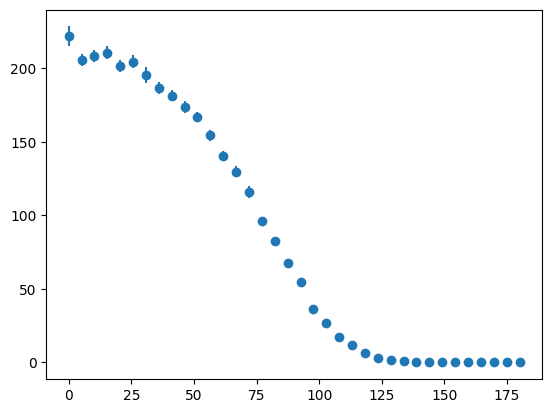

Warning, fit failed for mX 0.933, sigmaE = 1e-31, FDM0


In [57]:
import os
import re
import numpy as np

path = './damascus_modulated_rates_1e_screened_qcdark_Si/'

for file in os.listdir(path):
    mass_str = re.findall('mX_.+MeV',file)[0][3:-4]
    mX = float(mass_str.replace('_','.'))
    sigmaE = re.findall('sigmaE_.+_FD',file)[0][7:-3]
    Fdm= int(re.findall('FDM.+.csv',file)[0][3:-4])
    fdata = np.loadtxt(path + file,delimiter=',')
    isoangles_file = fdata[:,0]
    rates_file = fdata[:,1]
    rate_err_file = fdata[:,2]
    try:
        angle_grid,fit,errors = fitted_rates(isoangles_file,rates_file,rate_err_file)
    except (ValueError,RuntimeError):
        # fit failed
        import matplotlib.pyplot as plt
        plt.scatter(isoangles_file,rates_file)
        plt.errorbar(isoangles_file,rates_file,yerr=rate_err_file,ls="None")

        plt.show()
        plt.close()
        print(f"Warning, fit failed for mX {mX}, sigmaE = {sigmaE}, FDM{Fdm}")

        break


In [58]:
print(np.mean(rates_file))
rates_file_dm = rates_file /  np.mean(rates_file)
rate_err_file_dm = rate_err_file / np.mean(rates_file)
rate_err_file_dm

86.16080691835629


array([7.80988171e-02, 4.79467057e-02, 4.93586412e-02, 5.25107576e-02,
       4.77515550e-02, 5.17877080e-02, 6.35598850e-02, 4.99629836e-02,
       4.51780719e-02, 4.62745385e-02, 4.09487017e-02, 4.06611771e-02,
       3.91635245e-02, 4.19161868e-02, 4.57076205e-02, 3.57786189e-02,
       3.19745666e-02, 2.84873609e-02, 2.86780483e-02, 1.87550105e-02,
       1.51282287e-02, 1.52129099e-02, 1.19325079e-02, 6.00543871e-03,
       4.12893517e-03, 2.44960842e-03, 1.41467239e-03, 5.50603727e-04,
       2.16178482e-04, 2.65177080e-04, 9.65609463e-06, 3.93619342e-06,
       5.62061943e-06, 5.58161213e-06, 2.91700078e-06, 2.18638081e-13])

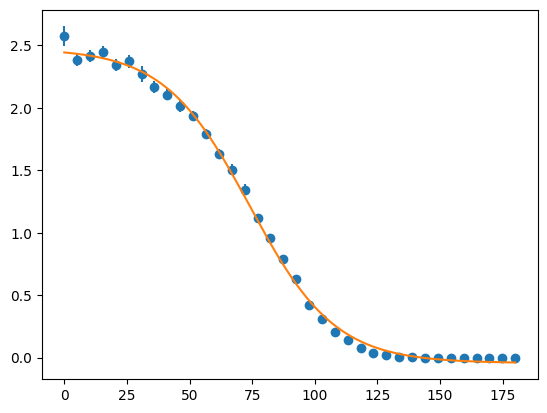

In [69]:
from scipy.optimize import curve_fit


plt.scatter(isoangles_file,rates_file_dm)
plt.errorbar(isoangles_file,rates_file_dm,yerr=rate_err_file_dm,ls="None")



parameters,covariance = curve_fit(hyp_tan_ff,isoangles_file,rates_file_dm,bounds=([-np.inf,0,0,0],[0,180,np.inf,np.inf]))

angle_grid = np.linspace(0,180,180)

fit_rates = hyp_tan_ff(angle_grid,*parameters)
plt.plot(angle_grid,fit_rates)
plt.show()
plt.close()

In [ ]:
hyp_tan_ff(theta,a,theta_0,theta_s,ff)
return (a/2)*np.tanh((theta-theta_0)/theta_s) + ff